Intenção aqui é trabalhar com a bse da rais e produzir gráficos de série para as cidades selecionadas
- Renda média do trabalho (tomar cuidado pq na RAIS, cada linha é um vínculo, não um indivíduo)
- Renda total em ocupações ou atividades relacionadas à tecnologia

In [165]:
# Carregar pacotes
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import altair as alt
from matplotlib.ticker import PercentFormatter

In [166]:
'''#leitura de uma das bases para entender funcionamento
teste = pd.read_csv("2019/MA2019.csv",
sep=",",encoding='utf-8',
low_memory=False,
usecols= ('CNAE 2.0 Classe','Faixa Etária','Vl Remun Média Nom',
'Vl Remun Média (SM)','Idade','Município','Raça Cor',
'Sexo Trabalhador', 'Tempo Emprego','Vínculo Ativo 31/12'))
teste.head()'''

'#leitura de uma das bases para entender funcionamento\nteste = pd.read_csv("2019/MA2019.csv",\nsep=",",encoding=\'utf-8\',\nlow_memory=False,\nusecols= (\'CNAE 2.0 Classe\',\'Faixa Etária\',\'Vl Remun Média Nom\',\n\'Vl Remun Média (SM)\',\'Idade\',\'Município\',\'Raça Cor\',\n\'Sexo Trabalhador\', \'Tempo Emprego\',\'Vínculo Ativo 31/12\'))\nteste.head()'

In [167]:
# Carregando e entendendo o objeto que continha os municípios que precisarei filtrar
municipios = pd.read_csv('totalGruposMunicipios.csv', sep=';')
municipios = municipios[['municipio_merge','grupo','codigo']]
municipios.rename(columns={'municipio_merge':'Município'},inplace=True)
municipios['Município'] = municipios['Município'].astype(str)# Garante que a variável está em str
municipios['codigo'] = municipios['codigo'].astype(str).str[:-1].astype(int)# Retira ultimo dígito para compatibilizar codigos
municipios['codigo']


0     292910
1     210760
2     291490
3     220095
4     221135
5     220670
6     290220
7     291500
8     293350
9     220210
10    220490
11    290080
12    292220
13    293120
14    290040
15    220755
16    220210
17    291875
18    220580
19    210197
20    220150
21    292270
22    210670
23    261510
24    250570
25    210690
26    292760
27    292935
28    291900
29    290510
30    220208
31    210180
32    280280
33    280170
34    280210
35    280760
36    280040
37    280750
38    280300
39    280510
40    280067
41    280620
42    280350
43    280580
44    280710
45    280550
46    280740
47    291650
48    280630
49    210565
50    210594
51    240040
52    240165
53    240600
54    240725
55    241000
56    241080
57    241310
58    241445
59    292640
Name: codigo, dtype: int32

In [168]:
'''dicio = {}
# Leitura dos dados de cada pasta
for pasta in os.listdir():# Pega arquivos da pasta rais para iterar sobre cada um deles
    if os.path.isdir(pasta) and pasta != 'ignore':
        print(pasta)# Identifica itens que são pastas
        for arquivo in os.listdir(pasta):# Iteração dentro das pastas
            try:# Prevenção de erros
                estado = arquivo[:2]# Extração do estado do arquivo
                ano = arquivo[2:6]# Extração do ano do arquivo

                try:
                    dados = pd.read_csv(f"{pasta}/{arquivo}", sep=";", encoding='latin-1', low_memory=False, usecols=(
                        'CNAE 2.0 Classe', 'Faixa Etária', 'Vl Remun Média Nom', 'Vl Remun Média (SM)', 'Idade',
                        'Município', 'Raça Cor', 'Sexo Trabalhador', 'Tempo Emprego', 'Vínculo Ativo 31/12'))
                    print(f"Arquivo {estado} {ano} lido com sucesso!")# Check decarregar a base(12 a 17)

                except ValueError:

                    try:
                        dados = pd.read_csv(f"{pasta}/{arquivo}", sep=";", encoding='utf-8', low_memory=False, usecols=(
                            'CNAE 2.0 Classe', 'Faixa Etária', 'Vl Remun Média Nom', 'Vl Remun Média (SM)', 'Idade',
                            'Município', 'Raça Cor', 'Sexo Trabalhador', 'Tempo Emprego', 'Vínculo Ativo 31/12'))
                        print(f"Arquivo {estado} {ano} lido com sucesso!")# Check decarregar a base (18)
                
                    except ValueError:
                        dados = pd.read_csv(f"{pasta}/{arquivo}", sep=",", encoding='utf-8', low_memory=False, usecols=(
                            'CNAE 2.0 Classe', 'Faixa Etária', 'Vl Remun Média Nom', 'Vl Remun Média (SM)', 'Idade',
                            'Município', 'Raça Cor', 'Sexo Trabalhador', 'Tempo Emprego', 'Vínculo Ativo 31/12'))
                        print(f"Arquivo {estado} {ano} lido com sucesso!")# Check decarregar a base(19 a 21)

                # Converter a lista de municípios em um conjunto para otimizar a filtragem
                municipios_set = set(municipios['codigo'])
                dados = dados[dados['Município'].isin(municipios_set)]# Filtrar as cidades desejadas
                print(f"Arquivo {estado} {ano} filtrado com sucesso!")# Check de filtro de cidade

                # Adição do Ano aos Dados
                dados['ano'] = ano

                #Adição do Estado aos Dados
                dados['Estado'] = estado

                dicio[estado + ano] = dados
                print(f"Arquivo {estado} {ano} adicionado ao dicionário!")# Check de adição ao dicionário

            except FileNotFoundError:
                print(f"Arquivo {pasta}/{arquivo} não encontrado.")
            except Exception as e:
                print(f"Erro ao processar arquivo {pasta}/{arquivo}: {e}")'''

'dicio = {}\n# Leitura dos dados de cada pasta\nfor pasta in os.listdir():# Pega arquivos da pasta rais para iterar sobre cada um deles\n    if os.path.isdir(pasta) and pasta != \'ignore\':\n        print(pasta)# Identifica itens que são pastas\n        for arquivo in os.listdir(pasta):# Iteração dentro das pastas\n            try:# Prevenção de erros\n                estado = arquivo[:2]# Extração do estado do arquivo\n                ano = arquivo[2:6]# Extração do ano do arquivo\n\n                try:\n                    dados = pd.read_csv(f"{pasta}/{arquivo}", sep=";", encoding=\'latin-1\', low_memory=False, usecols=(\n                        \'CNAE 2.0 Classe\', \'Faixa Etária\', \'Vl Remun Média Nom\', \'Vl Remun Média (SM)\', \'Idade\',\n                        \'Município\', \'Raça Cor\', \'Sexo Trabalhador\', \'Tempo Emprego\', \'Vínculo Ativo 31/12\'))\n                    print(f"Arquivo {estado} {ano} lido com sucesso!")# Check decarregar a base(12 a 17)\n\n             

In [169]:
'''# Entendendo resultado final 
teste = list(dicio.items())[1][1]
print(type(teste['ano']))
teste'''

"# Entendendo resultado final \nteste = list(dicio.items())[1][1]\nprint(type(teste['ano']))\nteste"

In [170]:
'''# Salvo em um dataframe
df = pd.concat(dicio.values())
df.tail()'''

'# Salvo em um dataframe\ndf = pd.concat(dicio.values())\ndf.tail()'

In [171]:
'''# Salvo objeto em csv para nao ter que rodar codigo toda vez
df.to_csv('rais_filtrada.csv', index = False)'''

"# Salvo objeto em csv para nao ter que rodar codigo toda vez\ndf.to_csv('rais_filtrada.csv', index = False)"

In [172]:
df = pd.read_csv('C:/Users/DESKTOP 15/Desktop/THP/rais/rais_filtrada.csv')

In [173]:
# Corrigindo coluna de valores numéricos
df['Vl Remun Média Nom'] = df['Vl Remun Média Nom'].str.replace(',','.').astype(float)

In [174]:
# Incluo as informações dos municípios 
df_grupos = df.merge(municipios[['grupo','codigo', 'Município']], how='left',left_on='Município',right_on='codigo')
df_grupos.head()

,CNAE 2.0 Classe,Vínculo Ativo 31/12,Faixa Etária,Idade,Município_x,Raça Cor,Vl Remun Média Nom,Vl Remun Média (SM),Sexo Trabalhador,Tempo Emprego,ano,Estado,grupo,codigo,Município_y
0,2101.0,0.0,7.0,57.0,290220.0,8.0,622.00,"000001,00",1.0,"15,0",2012,BA,Grupo_1 - PropPretos,290220,Aramari (BA)
1,2101.0,0.0,6.0,47.0,290220.0,8.0,621.95,"000000,99",1.0,"8,0",2012,BA,Grupo_1 - PropPretos,290220,Aramari (BA)
2,2101.0,0.0,6.0,48.0,290220.0,8.0,609.96,"000000,97",1.0,"21,0",2012,BA,Grupo_1 - PropPretos,290220,Aramari (BA)
3,2101.0,0.0,6.0,47.0,290220.0,8.0,642.08,"000001,03",1.0,"31,7",2012,BA,Grupo_1 - PropPretos,290220,Aramari (BA)
4,2101.0,0.0,5.0,35.0,290220.0,8.0,622.00,"000001,00",1.0,"13,0",2012,BA,Grupo_1 - PropPretos,290220,Aramari (BA)


In [175]:

# prim_graf primeiro grafico
prim_graf = df_grupos[['Vl Remun Média Nom', 'Município_y', 'Vínculo Ativo 31/12','grupo','ano']]
prim_graf = prim_graf[prim_graf['Vínculo Ativo 31/12'] == 1]


In [176]:
prim_graf

,Vl Remun Média Nom,Município_y,Vínculo Ativo 31/12,grupo,ano
5451,967.62,Aramari (BA),1.0,Grupo_1 - PropPretos,2012
5452,895.92,Aramari (BA),1.0,Grupo_1 - PropPretos,2012
5453,642.00,Aramari (BA),1.0,Grupo_1 - PropPretos,2012
5454,914.31,Aramari (BA),1.0,Grupo_1 - PropPretos,2012
5455,1020.69,Aramari (BA),1.0,Grupo_1 - PropPretos,2012
...,...,...,...,...,...
1006478,4660.90,Simão Dias (SE),1.0,Grupo_3 - Proximidade,2021
1006479,8885.56,Estância (SE),1.0,Grupo_3 - Proximidade,2021
1006480,6391.63,Boquim (SE),1.0,Grupo_3 - Proximidade,2021
1006481,6581.84,Cristinápolis (SE),1.0,Grupo_3 - Proximidade,2021


In [177]:
# Agrupando por municipio, calcular media da renda e contar contratos
agregacao = prim_graf.groupby(['grupo','ano']).agg(
    media_remuneracao=('Vl Remun Média Nom', 'mean'),
    numero_contratos=('Vl Remun Média Nom', 'count'),
    desv_pad_anual = ('Vl Remun Média Nom', 'std')
).reset_index()
agregacao

,grupo,ano,media_remuneracao,numero_contratos,desv_pad_anual
0,Grupo_1 - PropPretos,2012,897.761956,5557,465.163867
1,Grupo_1 - PropPretos,2013,1183.771802,13011,938.476334
2,Grupo_1 - PropPretos,2014,1229.216769,13402,920.533670
3,Grupo_1 - PropPretos,2015,1396.190995,12542,1125.172106
4,Grupo_1 - PropPretos,2016,1520.547917,12473,1191.185084
5,Grupo_1 - PropPretos,2017,1644.972032,12754,1338.223524
6,Grupo_1 - PropPretos,2018,1711.233975,13865,1399.336976
7,Grupo_1 - PropPretos,2019,1777.049090,14461,1450.567665
8,Grupo_1 - PropPretos,2020,1834.036678,13151,1560.456128
9,Grupo_1 - PropPretos,2021,1914.718516,15155,1474.938656


In [178]:
# Correção dos valores pela inflação(Fonte calculadora do cidadão)
constants = {
    2012: 1.79,
    2013: 1.69,
    2014: 1.60,
    2015: 1.50,
    2016: 1.36,
    2017: 1.28,
    2018: 1.24,
    2019: 1.19,
    2020: 1.15,
    2021: 1.00
}

agregacao['ano'] = pd.to_numeric(agregacao['ano'], errors='coerce')# Garante estar em numerico

# Criar a nova coluna com a remuneração ajustada
agregacao['remuneracao_ajustada'] = agregacao.apply(
    lambda row: row['media_remuneracao'] * constants.get(row['ano'], 1.0), axis=1
)# Multiplica cada uma das colunas com o correspondente ano pelo valor de correção respectivo
agregacao

,grupo,ano,media_remuneracao,numero_contratos,desv_pad_anual,remuneracao_ajustada
0,Grupo_1 - PropPretos,2012,897.761956,5557,465.163867,1606.993901
1,Grupo_1 - PropPretos,2013,1183.771802,13011,938.476334,2000.574345
2,Grupo_1 - PropPretos,2014,1229.216769,13402,920.533670,1966.746831
3,Grupo_1 - PropPretos,2015,1396.190995,12542,1125.172106,2094.286493
4,Grupo_1 - PropPretos,2016,1520.547917,12473,1191.185084,2067.945167
5,Grupo_1 - PropPretos,2017,1644.972032,12754,1338.223524,2105.564201
6,Grupo_1 - PropPretos,2018,1711.233975,13865,1399.336976,2121.930129
7,Grupo_1 - PropPretos,2019,1777.049090,14461,1450.567665,2114.688417
8,Grupo_1 - PropPretos,2020,1834.036678,13151,1560.456128,2109.142179
9,Grupo_1 - PropPretos,2021,1914.718516,15155,1474.938656,1914.718516


In [179]:
# Correção dos valores dos grupos
constants = {
    'Grupo_1 - PropPretos': 16,
    'Grupo_2 - IDH': 16,
    'Grupo_3 - Proximidade': 16,
    'Grupo_4 - Santa Luzia do Itanhy': 1,
    'Grupo_5 - Isolados': 11}

# Criar a nova coluna com a contagem ajustada
agregacao['num_cont_ajustad'] = agregacao.apply(
    lambda row: row['numero_contratos'] / constants.get(row['grupo'], 1.0), axis=1
).round().astype(int)

In [180]:
agregacao.to_csv('prim_seg_graf.csv')

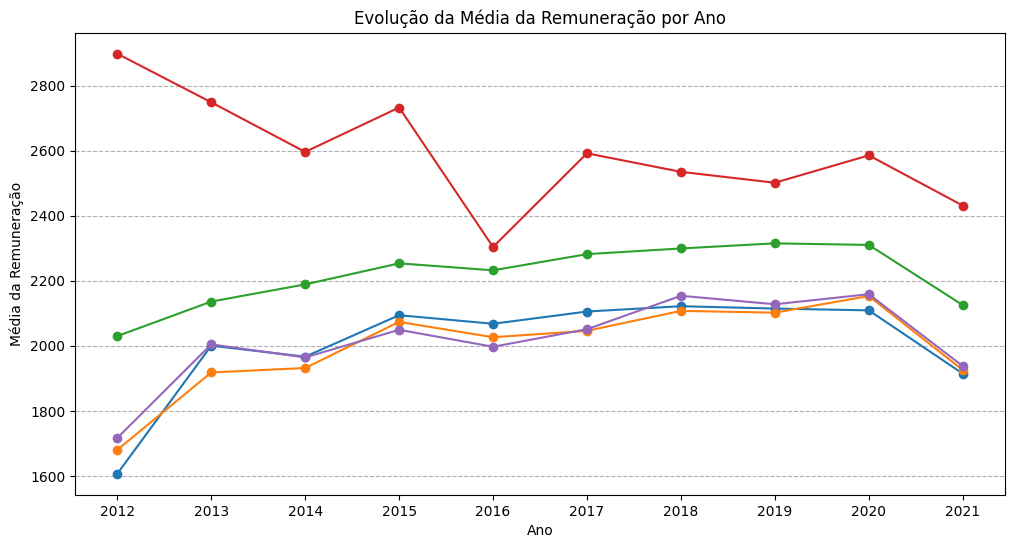

In [181]:
# Agrupar por grupo e criar um gráfico de linhas para cada grupo
plt.figure(figsize=(12, 6))

for grupo in agregacao['grupo'].unique():
    grupo_data = agregacao[agregacao['grupo'] == grupo]
    plt.plot(grupo_data['ano'], grupo_data['remuneracao_ajustada'], marker='o', linestyle='-', label=grupo)

plt.title('Evolução da Média da Remuneração por Ano')
plt.xlabel('Ano')
plt.ylabel('Média da Remuneração')
#plt.legend()
plt.grid(axis='y', linestyle='--')
plt.xticks(agregacao['ano'].unique())
plt.show()

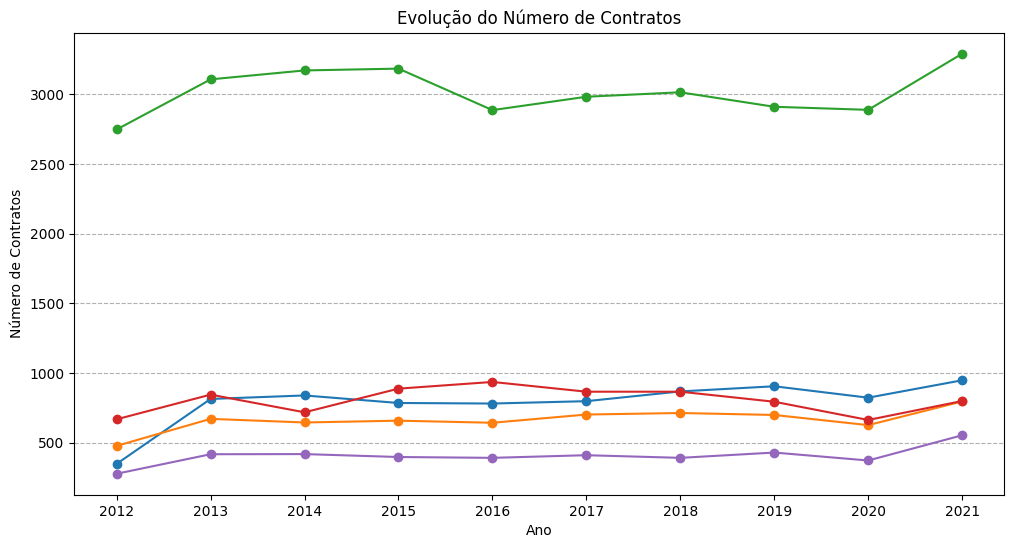

In [207]:
# Agrupar por grupo e criar um gráfico de linhas para cada grupo
plt.figure(figsize=(12, 6))

for grupo in agregacao['grupo'].unique():
    grupo_data = agregacao[agregacao['grupo'] == grupo]
    plt.plot(grupo_data['ano'], grupo_data['num_cont_ajustad'], marker='o', linestyle='-', label=grupo)

plt.title('Evolução do Número de Contratos')
plt.xlabel('Ano')
plt.ylabel('Número de Contratos')
#plt.legend()
plt.grid(axis='y', linestyle='--')
plt.xticks(agregacao['ano'].unique())
plt.show()

In [183]:
ter_graf = df_grupos[['CNAE 2.0 Classe', 'Município_y', 'Vínculo Ativo 31/12','grupo','ano']]
ter_graf = ter_graf[ter_graf['Vínculo Ativo 31/12'] == 1]

In [184]:
ter_graf['dum_tec'] = ter_graf['CNAE 2.0 Classe'].astype(str).str.match(r'^(58|59|60|61|62|63|64|65|66)').astype(int)
ter_graf['dum_tec'].value_counts()

dum_tec
0    757893
1      9940
Name: count, dtype: int64

Aumentar quantidade de siglas de tec

In [185]:
# Agrupando por municipio, calcular quantidade de vinculos totais e de tecnologia
agreg_ter = ter_graf.groupby(['grupo','ano']).agg(
    contagem_int=('CNAE 2.0 Classe', 'count'),
    contagem_tec=('dum_tec', 'sum')
).reset_index()

In [186]:
# Correção dos valores dos grupos(divide o valor total pela quantidade de municípios de cada grupo)
constants = {
    'Grupo_1 - PropPretos': 16,
    'Grupo_2 - IDH': 16,
    'Grupo_3 - Proximidade': 16,
    'Grupo_4 - Santa Luzia do Itanhy': 1,
    'Grupo_5 - Isolados': 11}

# Criar a nova coluna com a contagem ajustada
agreg_ter['contagem_int'] = agreg_ter.apply(
    lambda row: row['contagem_int'] / constants.get(row['grupo'], 1.0), axis=1
).round().astype(int)

# Criar a nova coluna com a contagem ajustada
agreg_ter['contagem_tec'] = agreg_ter.apply(
    lambda row: row['contagem_tec'] / constants.get(row['grupo'], 1.0), axis=1
).round().astype(int)

agreg_ter['tec_percent'] = agreg_ter['contagem_tec'] / agreg_ter['contagem_int']# Cria coluna de percentual

agreg_ter

,grupo,ano,contagem_int,contagem_tec,tec_percent
0,Grupo_1 - PropPretos,2012,347,1,0.002882
1,Grupo_1 - PropPretos,2013,813,7,0.008610
2,Grupo_1 - PropPretos,2014,838,8,0.009547
3,Grupo_1 - PropPretos,2015,784,7,0.008929
4,Grupo_1 - PropPretos,2016,780,7,0.008974
5,Grupo_1 - PropPretos,2017,797,6,0.007528
6,Grupo_1 - PropPretos,2018,867,6,0.006920
7,Grupo_1 - PropPretos,2019,904,7,0.007743
8,Grupo_1 - PropPretos,2020,822,9,0.010949
9,Grupo_1 - PropPretos,2021,947,10,0.010560


In [187]:
agreg_ter.to_csv('ter_graf.csv')

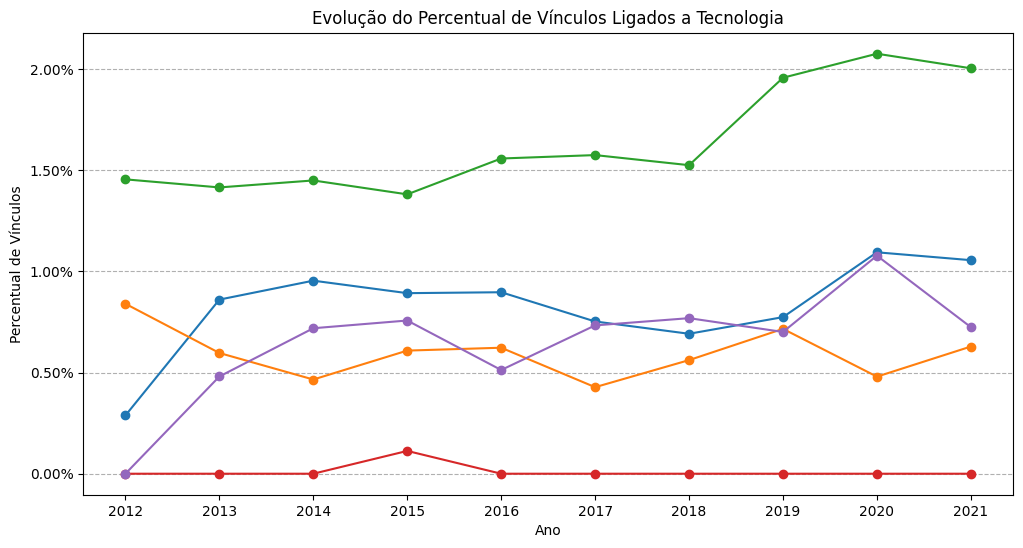

In [188]:

# Agrupar por grupo e criar um gráfico de linhas para cada grupo
plt.figure(figsize=(12, 6))

for grupo in agreg_ter['grupo'].unique():
    grupo_data = agreg_ter[agreg_ter['grupo'] == grupo]
    plt.plot(grupo_data['ano'], grupo_data['tec_percent'], marker='o', linestyle='-', label=grupo)

plt.title('Evolução do Percentual de Vínculos Ligados a Tecnologia')
plt.xlabel('Ano')
plt.ylabel('Percentual de Vínculos')
#plt.legend()
plt.grid(axis='y', linestyle='--')
plt.xticks(ter_graf['ano'].unique())
# Obter o eixo y
eixo_y = plt.gca().yaxis

# Aplicar o formatador de porcentagem
eixo_y.set_major_formatter(PercentFormatter(xmax=1.0))  # xmax=1.0 para indicar que 1.0 é 100%

plt.show()

= Serão 4 gráficos no total:
- Evolução de quantidade de vínculos no ano(ativos e inativos pq é vinculo criado)
- Renda média no decorrer dos anos
- Porcentagem de vinculos ligados a tecnologia(usar CNAE)
- Dados de idade e sexo(quanto cada um representa do total, seis grupos num total)
    - Aqui é aquela parada de fixar a proporção no ano 1 e ir comparando nos anos seguintes

Codigos CNAE aparentemente ligados a tecnologia:
- 58 a 63	(INFORMAÇÃO E COMUNICAÇÃO)
adicionar 2010 e 11 nas series

In [208]:
quar_graf = df_grupos[['Idade', 'Município_y', 'Vínculo Ativo 31/12','grupo','ano','Sexo Trabalhador','Vl Remun Média Nom']]
quar_graf = quar_graf[quar_graf['Vínculo Ativo 31/12'] == 1].drop(columns = 'Vínculo Ativo 31/12')

In [209]:
quar_graf['Idade'] = pd.to_numeric(quar_graf['Idade'], errors='coerce')# Garante estar em numerico

quar_graf['faixa1'] = (quar_graf['Idade'] < 25).astype(int)
quar_graf['faixa2'] = ((25 <= quar_graf['Idade']) & (quar_graf['Idade'] < 29)).astype(int)
quar_graf['faixa3'] = (quar_graf['Idade'] >= 29).astype(int)

In [210]:
# 1 = Masculino / 2 = Feminino
# Renomeando a coluna `Sexo Trabalhador`
quar_graf = quar_graf.rename(columns={'Sexo Trabalhador': 'sexo'})

# Mapeando os valores da coluna `sexo`
mapeamento_sexo = {1: 'Masculino', 2: 'Feminino'}
quar_graf['sexo'] = quar_graf['sexo'].map(mapeamento_sexo)

In [211]:
df = quar_graf
# 1. Criação da coluna 'Faixa Etária'
def categorizar_idade(idade):
    if 19 <= idade <= 24:
        return '1 (18-24)'
    elif 25 <= idade <= 29:
        return '2 (25-29)'
    elif 29 < idade:
        return '3 (29+)'

df['Faixa Etária'] = df['Idade'].apply(categorizar_idade)

# 2. Agrupamento e cálculo da soma da renda por grupo, ano, faixa etária e sexo
renda_por_grupo_ano_faixa_sexo = df.groupby(['grupo', 'ano', 'Faixa Etária', 'sexo'])['Vl Remun Média Nom'].sum().reset_index()

# 3. Agrupamento e cálculo da soma da renda total por grupo e ano
renda_total_por_grupo_ano = df.groupby(['grupo', 'ano'])['Vl Remun Média Nom'].sum().reset_index()

# 4. Merge dos DataFrames
df_merged = pd.merge(renda_por_grupo_ano_faixa_sexo, renda_total_por_grupo_ano, on=['grupo', 'ano'], suffixes=('', '_total'))

# 5. Cálculo da proporção da renda
df_merged['Proporção da Renda'] = df_merged['Vl Remun Média Nom'] / df_merged['Vl Remun Média Nom_total']



In [212]:
df_merged.to_csv('quar_graf_sem_nrmalizacao.csv')

In [213]:
# Lista de grupos únicos
grupos = df_merged['grupo'].unique()

# Loop para criar um gráfico para cada grupo
for grupo in grupos:
    # Filtra os dados do grupo atual
    df_grupo = df_merged[df_merged['grupo'] == grupo]

    # Criação do gráfico de linhas para o grupo atual
    chart = alt.Chart(df_grupo).mark_line(point=True).encode(
        x=alt.X('ano:N', axis=alt.Axis(labelAngle=-45, title='Ano'), scale=alt.Scale(paddingInner=0.5)),  # Ajusta o espaçamento e ângulo do label
        y=alt.Y('Proporção da Renda:Q', title='Proporção da Renda'),
        color=alt.Color('Faixa Etária:N', legend=None),
        strokeDash= alt.StrokeDash('sexo:N', legend=None),
        tooltip=['ano', 'Proporção da Renda', 'Faixa Etária', 'sexo']
    ).properties(
        title=f'Evolução da Proporção da Renda por Faixa Etária e Sexo - {grupo}',
        width=800  # Define a largura do gráfico
    )

    # Mostra o gráfico do grupo atual
    chart.show()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [214]:
print(df_merged.to_string())

                               grupo   ano Faixa Etária       sexo  Vl Remun Média Nom  Vl Remun Média Nom_total  Proporção da Renda
0               Grupo_1 - PropPretos  2012    1 (18-24)   Feminino            19408.72              4.988863e+06            0.003890
1               Grupo_1 - PropPretos  2012    1 (18-24)  Masculino           321421.77              4.988863e+06            0.064428
2               Grupo_1 - PropPretos  2012    2 (25-29)   Feminino           120886.13              4.988863e+06            0.024231
3               Grupo_1 - PropPretos  2012    2 (25-29)  Masculino           632826.69              4.988863e+06            0.126848
4               Grupo_1 - PropPretos  2012      3 (29+)   Feminino          1015385.80              4.988863e+06            0.203530
5               Grupo_1 - PropPretos  2012      3 (29+)  Masculino          2862809.08              4.988863e+06            0.573840
6               Grupo_1 - PropPretos  2013    1 (18-24)   Feminino   

In [215]:
# 6. Encontrar o primeiro ano para cada grupo e faixa etária
primeiro_ano_por_grupo_faixa = df_merged.groupby(['grupo', 'Faixa Etária'])['ano'].min().reset_index()
primeiro_ano_por_grupo_faixa = primeiro_ano_por_grupo_faixa.rename(columns={'ano': 'primeiro_ano'})

# 7. Merge para obter a renda do primeiro ano
df_merged = pd.merge(df_merged, primeiro_ano_por_grupo_faixa, on=['grupo', 'Faixa Etária'])

# Filtrar os dados do primeiro ano para cada grupo e faixa etária
df_primeiro_ano = df_merged[df_merged['ano'] == df_merged['primeiro_ano']].copy()

# Renomear a coluna de renda do primeiro ano
df_primeiro_ano = df_primeiro_ano.rename(columns={'Proporção da Renda': 'Proporção da Renda_primeiro_ano'})

# 8. Merge novamente para ter a renda do primeiro ano em todas as linhas
df_merged = pd.merge(df_merged, df_primeiro_ano[['grupo', 'Faixa Etária', 'sexo', 'Proporção da Renda_primeiro_ano']], 
                     on=['grupo', 'Faixa Etária', 'sexo'], how='left')

# 9. Normalizar a proporção da renda em relação ao primeiro ano
df_merged['Proporção da Renda'] = df_merged['Proporção da Renda'] / df_merged['Proporção da Renda_primeiro_ano']

# 10. Remover colunas auxiliares (opcional)
df_merged = df_merged.drop(columns=['primeiro_ano', 'Proporção da Renda_primeiro_ano'])

In [216]:
df_merged.to_csv('quar_graf_com_nrmalizacao.csv')

In [217]:
# Lista de grupos únicos
grupos = df_merged['grupo'].unique()

# Loop para criar um gráfico para cada grupo
for grupo in grupos:
    # Filtra os dados do grupo atual
    df_grupo = df_merged[df_merged['grupo'] == grupo]

    # Criação do gráfico de linhas para o grupo atual
    chart = alt.Chart(df_grupo).mark_line(point=True).encode(
        x=alt.X('ano:N', axis=alt.Axis(labelAngle=-45, title='Ano'), scale=alt.Scale(paddingInner=0.5)),  # Ajusta o espaçamento e ângulo do label
        y=alt.Y('Proporção da Renda:Q', title='Proporção da Renda'),
        color=alt.Color('Faixa Etária:N', legend=None),
        strokeDash= alt.StrokeDash('sexo:N', legend=None),
        tooltip=['ano', 'Proporção da Renda', 'Faixa Etária', 'sexo']
    ).properties(
        title=f'Evolução da Proporção da Renda por Faixa Etária e Sexo - {grupo}',
        width=800  # Define a largura do gráfico
    )

    # Mostra o gráfico do grupo atual
    chart.show()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [218]:
'''# 2. Agregação
# Calculando a soma da renda por grupo demográfico
grouped_data = quar_graf.groupby(['ano', 'grupo', 'faixa1', 'faixa2', 'faixa3', 'sexo']).agg(
    renda_grupo=('Vl Remun Média Nom', 'sum')
).reset_index()

# Calculando a renda total por ano e grupo
total_renda_ano = quar_graf.groupby(['ano'])['Vl Remun Média Nom'].sum().reset_index()
total_renda_ano = total_renda_ano.rename(columns={'Vl Remun Média Nom': 'renda_total'})

# Juntando os dados agregados ao DataFrame original
merge_graf = pd.merge(grouped_data, total_renda_ano, on='ano')

# 3. Cálculo da Parcela da Renda
merge_graf['parcela_renda'] = merge_graf['renda_grupo'] / merge_graf['renda_total']'''


"# 2. Agregação\n# Calculando a soma da renda por grupo demográfico\ngrouped_data = quar_graf.groupby(['ano', 'grupo', 'faixa1', 'faixa2', 'faixa3', 'sexo']).agg(\n    renda_grupo=('Vl Remun Média Nom', 'sum')\n).reset_index()\n\n# Calculando a renda total por ano e grupo\ntotal_renda_ano = quar_graf.groupby(['ano'])['Vl Remun Média Nom'].sum().reset_index()\ntotal_renda_ano = total_renda_ano.rename(columns={'Vl Remun Média Nom': 'renda_total'})\n\n# Juntando os dados agregados ao DataFrame original\nmerge_graf = pd.merge(grouped_data, total_renda_ano, on='ano')\n\n# 3. Cálculo da Parcela da Renda\nmerge_graf['parcela_renda'] = merge_graf['renda_grupo'] / merge_graf['renda_total']"

In [219]:
print(df_merged.to_string())

                               grupo   ano Faixa Etária       sexo  Vl Remun Média Nom  Vl Remun Média Nom_total  Proporção da Renda
0               Grupo_1 - PropPretos  2012    1 (18-24)   Feminino            19408.72              4.988863e+06            1.000000
1               Grupo_1 - PropPretos  2012    1 (18-24)  Masculino           321421.77              4.988863e+06            1.000000
2               Grupo_1 - PropPretos  2012    2 (25-29)   Feminino           120886.13              4.988863e+06            1.000000
3               Grupo_1 - PropPretos  2012    2 (25-29)  Masculino           632826.69              4.988863e+06            1.000000
4               Grupo_1 - PropPretos  2012      3 (29+)   Feminino          1015385.80              4.988863e+06            1.000000
5               Grupo_1 - PropPretos  2012      3 (29+)  Masculino          2862809.08              4.988863e+06            1.000000
6               Grupo_1 - PropPretos  2013    1 (18-24)   Feminino   

In [220]:
soma = df_merged['Proporção da Renda'][:6].sum()
soma

6.0